In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#Data Analysis Libraries:
import pandas as pd
import numpy as np
#Data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re #regular expression matching operations
import folium #maping crime on the map
from folium.plugins import HeatMap, MarkerCluster #making maping visually appealing
import json
import plotly.express as px

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#Notebook widgets 
from ipywidgets import widgets
from ipywidgets import *
from IPython.display import display,clear_output

In [3]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [4]:
india_states = json.load(open("Data\states_india.geojson", "r"))

In [5]:
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]

In [6]:
df = pd.read_csv("Data\india_census.csv")
df["Density"] = df["Density[a]"].apply(lambda x: int(x.split("/")[0].replace(",", "")))
df["id"] = df["State or union territory"].apply(lambda x: state_id_map[x])

In [7]:
df.head()

,Rank,State or union territory,Population,Population (%),Decadal growth(2001���,Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio,Crime Against women,Density,id
0,NaN,Andaman & Nicobar Island,380581,NaN,6.90%,237093,NaN,143488,NaN,"8,249��km2 (3,185��",46/km2 (120/sq��,876,15341,46,35
1,10.0,Andhra Pradesh,49577103,NaN,11.00%,34966693,NaN,14610410,NaN,"162,968��km2 (62,922��",303/km2 (780/sq��,993,370,303,28
2,26.0,Arunanchal Pradesh,1383727,NaN,26.00%,1066358,NaN,317369,NaN,"83,743��km2 (32,333��",17/km2 (44/sq��,938,22759,17,12
3,15.0,Assam,31205576,NaN,17.10%,26807034,NaN,4398542,NaN,"78,438��km2 (30,285��","397/km2 (1,030/sq��",954,13327,397,18
4,3.0,Bihar,104099452,NaN,25.40%,92341436,NaN,11758016,NaN,"94,163��km2 (36,357��","1,102/km2 (2,850/sq��",918,5558,1102,10


<AxesSubplot:>

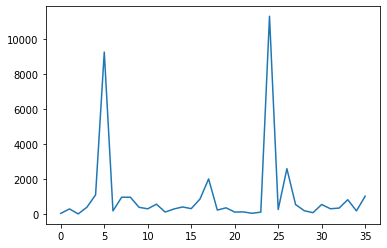

In [8]:

df["Density"].plot()

In [9]:
df["DensityScale"] = np.log10(df["Density"])

<AxesSubplot:>

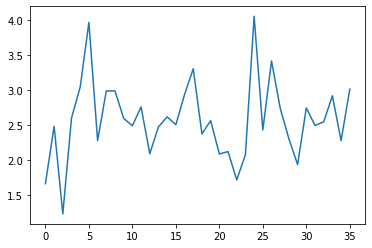

In [10]:
df["DensityScale"].plot()

In [11]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="DensityScale",
    hover_name="State or union territory",
    hover_data=["Density"],
    title="India Population Density",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [12]:
fig = px.choropleth_mapbox(
    df,
    locations="id",
    geojson=india_states,
    color="DensityScale",
    hover_name="State or union territory",
    hover_data=["Density"],
    title="India Population Density",
    mapbox_style="carto-positron",
    center={"lat": 24, "lon": 78},
    zoom=3,
    opacity=0.5,
)
fig.show()

In [13]:
df["SexRatioScale"] = df["Sex ratio"] - 1000

In [14]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="SexRatioScale",
    hover_name="State or union territory",
    hover_data=["Sex ratio"],
    title="India Sex Ratio",
    color_continuous_scale=px.colors.diverging.BrBG,
    color_continuous_midpoint=0,
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [15]:
fig = px.choropleth(locations=["India"], locationmode="country names", color=[1])
fig.show()

In [54]:
cag = pd.read_excel("Data/crime against women 2001-2020.xlsx")

In [20]:
cag.describe()

,Id,Year,Rape,Kidnapping & Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of women,Cruelty by Husband or his Relatives,Importation of Girls from foreign country,Immoral Traffic (P) Act,Dowry Prohibition Act,Indecent Representation of Women(P) Act,Commission of Sati Prevention Act,Total Crimes Against Women
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,353.000000,2010.564356,748.408769,1051.055163,231.110325,1560.773692,284.718529,2587.722772,1.405941,101.953324,206.193777,22.178218,0.002829,7054.831683
std,204.237607,5.781163,978.761113,1815.444483,490.855026,2264.112550,651.499231,4062.632132,6.968819,349.773017,558.340292,169.872230,0.053149,9538.075175
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.500000,2006.000000,41.000000,28.000000,1.000000,53.500000,3.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,165.000000
50%,353.000000,2011.000000,354.000000,290.000000,38.000000,476.000000,30.000000,728.000000,0.000000,11.000000,4.000000,0.000000,0.000000,3132.000000
75%,529.500000,2016.000000,1053.000000,1283.000000,276.500000,2212.000000,188.000000,3565.000000,0.000000,57.500000,54.000000,1.000000,0.000000,11111.500000
max,706.000000,2020.000000,6025.000000,20135.000000,7335.000000,15713.000000,4970.000000,28380.000000,83.000000,5232.000000,6766.000000,2657.000000,1.000000,59853.000000


In [21]:
cag

,Id,State/UT,Year,Rape,Kidnapping & Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of women,Cruelty by Husband or his Relatives,Importation of Girls from foreign country,Immoral Traffic (P) Act,Dowry Prohibition Act,Indecent Representation of Women(P) Act,Commission of Sati Prevention Act,Total Crimes Against Women
0,0,Andhra Pradesh,2001,871,765,420,3544,2271,5791,7,1332,551,925,0,16477
1,1,Arunachal Pradesh,2001,33,55,0,78,3,11,0,0,0,0,0,180
2,2,Assam,2001,817,1070,59,850,4,1248,0,6,179,10,0,4243
3,3,Bihar,2001,888,518,859,562,21,1558,83,29,835,3,0,5356
4,4,Chhattisgarh,2001,959,171,70,1763,161,840,0,12,13,0,0,3989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,702,D&N Haveli,2020,8,19,1,5,0,5,0,0,0,0,0,38
703,703,Daman & Diu,2020,5,5,0,5,0,1,0,0,0,0,0,16
704,704,Delhi UT,2020,2199,2401,600,3367,1492,3521,0,0,60,0,0,13640
705,705,Lakshadweep,2020,0,0,0,6,3,2,0,0,0,0,0,11


In [22]:
cag.head

<bound method NDFrame.head of       Id           State/UT  Year  Rape  Kidnapping & Abduction  Dowry Deaths  \
0      0     Andhra Pradesh  2001   871                     765           420   
1      1  Arunachal Pradesh  2001    33                      55             0   
2      2              Assam  2001   817                    1070            59   
3      3              Bihar  2001   888                     518           859   
4      4       Chhattisgarh  2001   959                     171            70   
..   ...                ...   ...   ...                     ...           ...   
702  702         D&N Haveli  2020     8                      19             1   
703  703        Daman & Diu  2020     5                       5             0   
704  704           Delhi UT  2020  2199                    2401           600   
705  705        Lakshadweep  2020     0                       0             0   
706  706         Puducherry  2020     6                      30             1  

In [23]:
cag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Id                                                    707 non-null    int64 
 1   State/UT                                              707 non-null    object
 2   Year                                                  707 non-null    int64 
 3   Rape                                                  707 non-null    int64 
 4   Kidnapping & Abduction                                707 non-null    int64 
 5   Dowry Deaths                                          707 non-null    int64 
 6   Assault on women with intent to outrage her modesty   707 non-null    int64 
 7   Insult to modesty of women                            707 non-null    int64 
 8   Cruelty by Husband or his Relatives                   707 non-null    

In [82]:
cag.isnull().values.any()

False

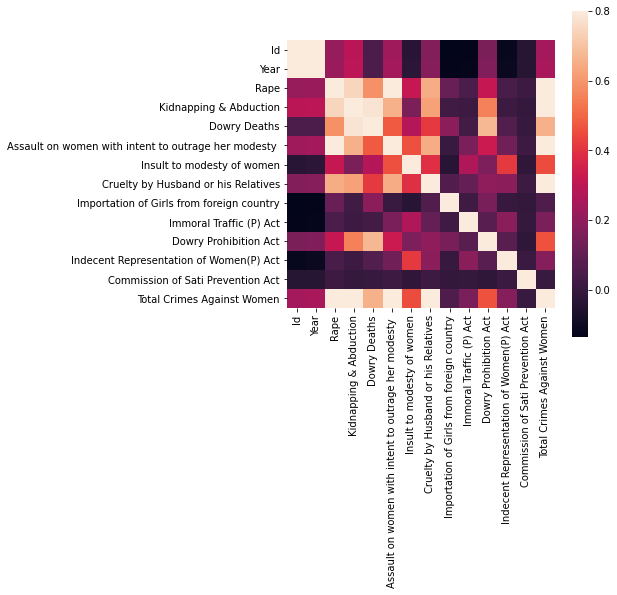

In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
corr=cag.corr()
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr, vmax=.8, square=True);

In [58]:
cag.describe(include='O')

,State/UT
count,707
unique,36
top,Delhi UT
freq,20


In [59]:
cag.kurt()

Id                                                       -1.200000
Year                                                     -1.212025
Rape                                                      4.594725
Kidnapping & Abduction                                   23.959734
Dowry Deaths                                             67.246932
Assault on women with intent to outrage her modesty       5.213186
Insult to modesty of women                               16.049892
Cruelty by Husband or his Relatives                       8.036803
Importation of Girls from foreign country                64.447459
Immoral Traffic (P) Act                                  95.680352
Dowry Prohibition Act                                    37.243534
Indecent Representation of Women(P) Act                 148.052399
Commission of Sati Prevention Act                       350.988640
Total Crimes Against Women                                5.257907
dtype: float64

In [60]:
cag.skew()

Id                                                       0.000000
Year                                                    -0.015346
Rape                                                     2.019106
Kidnapping & Abduction                                   3.859912
Dowry Deaths                                             6.223738
Assault on women with intent to outrage her modesty      2.111210
Insult to modesty of women                               3.719627
Cruelty by Husband or his Relatives                      2.553410
Importation of Girls from foreign country                7.512975
Immoral Traffic (P) Act                                  8.605252
Dowry Prohibition Act                                    4.905606
Indecent Representation of Women(P) Act                 11.344366
Commission of Sati Prevention Act                       18.761550
Total Crimes Against Women                               2.019603
dtype: float64

In [83]:
#Converting Year column to integer datatype:
cag['Year'] = cag['Year'].apply(lambda x:int(x))
cag.columns

Index(['Id', 'State/UT', 'Year', 'Rape', 'Kidnapping & Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty ',
       'Insult to modesty of women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls from foreign country', 'Immoral Traffic (P) Act',
       'Dowry Prohibition Act', 'Indecent Representation of Women(P) Act',
       'Commission of Sati Prevention Act', 'Total Crimes Against Women'],
      dtype='object')

In [86]:
#Crime head dictionary:
#With Sum aggr:
crimeDictS = {'Rape':sum, 'Kidnapping & Abduction':sum,'Dowry Deaths':sum,'Assault on women with intent to outrage her modesty ':sum,'Insult to modesty of women':sum,'Cruelty by Husband or his Relatives':sum,'Importation of Girls from foreign country':sum,'Immoral Traffic (P) Act':sum,'Dowry Prohibition Act':sum,'Indecent Representation of Women(P) Act':sum,'Commission of Sati Prevention Act':sum}
#Without aggr list:
crimeDict = ['Rape', 'Kidnapping & Abduction', 'Dowry Deaths','Assault on women with intent to outrage her modesty ','Insult to modesty of women', 'Cruelty by Husband or his Relatives','Importation of Girls from foreign country', 'Immoral Traffic (P) Act','Dowry Prohibition Act', 'Indecent Representation of Women(P) Act','Commission of Sati Prevention Act']

In [87]:
#Removing 'Year' column and grouping statewise by aggregating the columns values as sum
crimes = cag.groupby(["State/UT"], as_index=False).agg(crimeDictS)
#adding new column with sum of crimes for each state
crimes['Total'] = crimes[crimeDict].sum(axis=1)
crimes.head()

,State/UT,Rape,Kidnapping & Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of women,Cruelty by Husband or his Relatives,Importation of Girls from foreign country,Immoral Traffic (P) Act,Dowry Prohibition Act,Indecent Representation of Women(P) Act,Commission of Sati Prevention Act,Total
0,A & N Islands,376,228,16,610,96,228,0,17,7,0,0,1578
1,Andhra Pradesh,22105,21730,8128,91034,57571,177561,17,9016,15416,13335,0,415913
2,Arunachal Pradesh,1108,1429,5,1673,38,584,0,11,0,0,0,4848
3,Assam,31987,61977,3074,43098,613,125777,21,588,1344,20,0,268499
4,Bihar,21797,58652,23355,11307,913,57697,462,542,31469,10,0,206204


In [89]:
# adding back "Year" column to our data
crimesYear = cag.groupby(["State/UT","Year"], as_index=False).agg(crimeDictS)
#Making all the crime heads as a single categorical column:
crimesYear_1 = crimesYear.melt(id_vars = ["State/UT", "Year"], value_vars = crimeDict, var_name = 'Crime Head',value_name='no. of crimes')
crimesYear_1.head()

,State/UT,Year,Crime Head,no. of crimes
0,A & N Islands,2001,Rape,3
1,A & N Islands,2002,Rape,2
2,A & N Islands,2003,Rape,2
3,A & N Islands,2004,Rape,10
4,A & N Islands,2005,Rape,4


In [1]:
plt.figure(figsize=(10,15))
plt.title('Year wise Crime Head')
sns.set(style="ticks",rc={"lines.linewidth": 0.7})
sns.pointplot(data=crimesYear_1, x = 'Year',  y = 'no. of crimes', hue = 'Crime Head',palette='deep',markers=['v','h','X','P','D','1','2','s','x','o','>'],scale = 3)

NameError: name 'plt' is not defined

Dropdown(description='Select State:', index=3, options=('Andhra Pradesh', 'Uttar Pradesh', 'West Bengal', 'Raj…

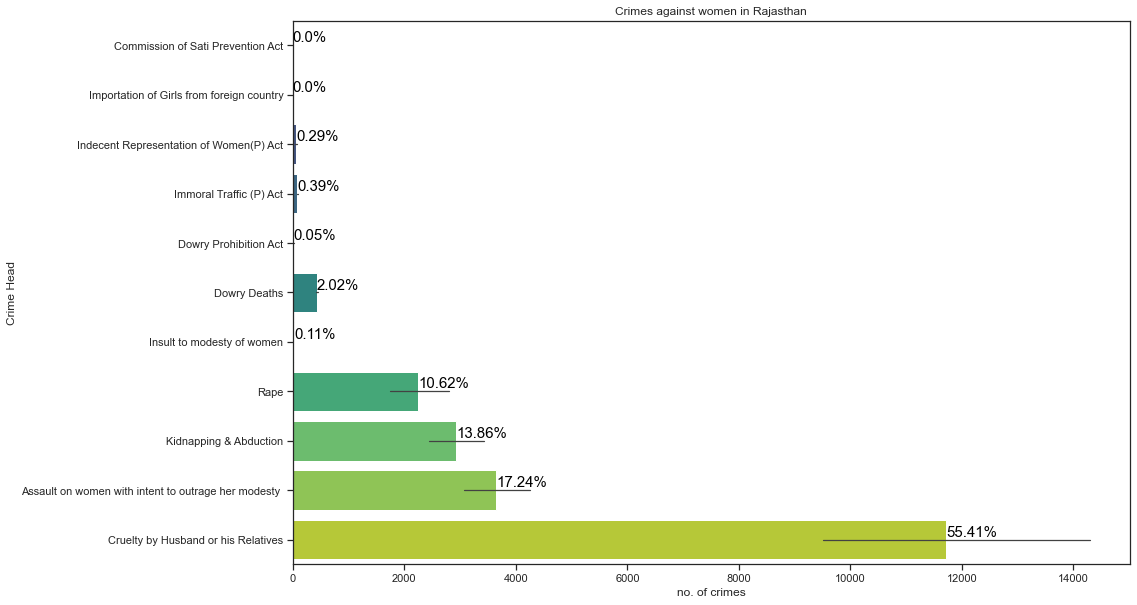

In [94]:
states = ["Andhra Pradesh","Uttar Pradesh","West Bengal","Rajasthan","Madhya Pradesh"]
select_variable = widgets.Dropdown(
    options=states,
    value=states[0],
    description='Select State:',
    disabled=False,
    button_style=''
)
def get_and_plot(b):
    clear_output()
    display(select_variable)
    #print(select_variable.value)
    state = select_variable.value
    apYear = cag.groupby(["State/UT","Year"], as_index=False).agg(crimeDictS)
     #Making all the crime heads as a single categorical column:
    apYear_1 = apYear.melt(id_vars = ["State/UT", "Year"], value_vars = crimeDict, var_name ='Crime Head',value_name='no. of crimes') 
    plt.figure(figsize=(15,10))
    plt.title('Crimes against women in '+state)
    order = apYear_1.groupby(["Crime Head"])['no. of crimes'].aggregate(np.sum).reset_index().sort_values('no. of crimes')
    ax = sns.barplot(y='Crime Head', x=apYear_1[apYear_1['State/UT']==state]['no. of crimes'],data=apYear_1,order=order['Crime Head'],palette='viridis')
    # create a list to collect the plt.patches data
    totals = []
    # find the values and append to list
    for i in ax.patches:
         totals.append(i.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.3, i.get_y()+.33,str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,color='black')
# invert for largest on top 
ax.invert_yaxis()
display(select_variable)
select_variable.observe(get_and_plot, names='value')

In [96]:
top_rape_cases = cag.sort_values(by='Rape',ascending=False)
Rape20=top_rape_cases.head(20)


In [66]:
!pip install bs4

Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'


In [68]:
#state images needed for map
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html = urlopen('https://www.thebetterindia.com/92039/immagine-photo-story-states-of-india/')
bs = BeautifulSoup(html, 'html.parser')
images = bs.find_all('img', {'src':re.compile('.jpg')})
for image in images: 
    print(image['src']+'\n')


https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/iwif-2014-nagaland.jpg

https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/andhra-pradesh-iwif-2016-1.jpg

https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/arunachal-pradesh-iwif-2016.jpg

https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/assam-iwif-2016.jpg

https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/bihar-iwif-2016.jpg

https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/chhattisgarh-iwif-2016.jpg

https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/delhi-iwif-2016.jpg

https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/goa-iwif-2016.jpg

https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/gujarat-iwif-2016.jpg

https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/haryana-iwif-2016.jpg

https://thebetterindia-static.gumlet.io/wp-content/uploads/2017/03/himachal-pradesh-i

In [69]:
import folium 
import pandas
import numpy as np
from folium.plugins import HeatMap

data=pandas.read_csv(r'C:\Users\srini\OneDrive\Desktop\Datasets\folimap.csv',encoding="cp1252")

LAT=list(data['LAT'])
LON=list(data['LON'])
name=list(data['NAME'])
Population=list(data['Population'])
crime=list(data['crime'])
crimerate=list(data['crimerate'])
website=list(data['website'])
picture=list(data['picture'])

fg=folium.FeatureGroup('my map')
fg.add_child(folium.GeoJson(data=(open('C:\\Users\\srini\\OneDrive\\Desktop\\Mission Project ISRO\\web Map\\Indian_States.json','r',encoding='utf-8-sig').read()))) 
for lt,ln,nm,po,c,cr,ws,pic in zip(LAT,LON,name,Population,crime,crimerate,website,picture):
 	fg.add_child(folium.Marker(location=[lt,ln],popup="<b>State Name  : </b>"+nm+ "<br> <b>Population : </b> "+str(po)+"<br><b>Crime Against women(in thousands): </b>"+str(c)+ "<br><b>Overall Rank: </b>"+str(cr)+ "<br><b>Crime Complaint website: </b><a href="+ws+">click here</a>"+"<br> <img src="+pic+" height=142 width=290>",icon=folium.Icon(color='green')))
map=folium.Map(location=[21.1458,79.0882],zoom_start=5)
map.add_child(fg)
folium.TileLayer('Stamen Terrain').add_to(map)
folium.TileLayer('Stamen Toner').add_to(map)
folium.TileLayer('Stamen Water Color').add_to(map)
folium.TileLayer('cartodbpositron').add_to(map)
folium.TileLayer('cartodbdark_matter').add_to(map)
folium.LayerControl().add_to(map)
map.add_child(fg)
map.save('Map1.html')


In [ ]:
!pip install plotly-geo

In [2]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
all_df= pd.read_excel(r'C:\Users\srini\OneDrive\Desktop\Datasets\statewise.xlsx')

In [3]:
all_df.head()

,sl.no,Indicator,Longitude,Latitude,Per Capita NSDP,Growth in Per Capita NSDP,Growth rate in GSDP-Total,Growth rate in GSDP-Agriculture,Growth rate in GSDP-Industry,Growth rate in GSDP-services,...,Dropout Rate: Primary Level,Dropout Rate: Upper Primary Level,Gross Enrolment Ratio: Primary Level,Net Enrolment Ratio: Primary Level,Gross Enrolment Ratio: Upper Primary Level,Net Enrolment Ratio: Upper Primary Level,Household availing banking services,Households with latrine facility within premises,Safe Drinking Water (Tap/Handpump/Tubewell),Forest Cover
0,1,Andhra Pradesh,79.916203,16.554124,13,13,21,6,27,20,...,21,21,4,3,3,5,12,9,20,10
1,2,Arunachal Pradesh,94.545327,27.725765,17,26,22,16,2,29,...,25,4,27,0,25,25,11,15,13,28
2,3,Assam,92.657310,26.321341,26,12,15,7,15,15,...,13,13,23,0,10,16,4,17,8,18
3,4,Bihar,85.636774,25.771394,29,1,1,15,25,1,...,12,8,5,15,7,20,5,3,26,6
4,5,Chhattisgarh,82.125093,21.555739,22,27,20,5,16,23,...,9,6,14,20,19,18,8,4,17,19


In [97]:
!pip install folium

In [4]:
from branca.element import Figure
fig2=Figure(width=800,height=650)
m5=folium.Map(location=[28.644800, 77.216721], zoom_start=5)

for index, row in all_df[["Latitude", "Longitude"]].dropna().iterrows():
    position=(row["Latitude"], row["Longitude"])
    folium.Marker(position,popup=all_df['Indicator'][index]).add_to(m5)
fig2.add_child(m5)
folium.plugins.Draw(export=True).add_to(m5)
folium.plugins.MeasureControl(position='topright', 
                                         #active_color="red",
                                         #completed_color="red",
                                         primary_length_unit='miles', 
                                         secondary_length_unit='miles', 
                                         primary_area_unit='sqmeters', 
                                         secondary_area_unit='acres').add_to(m5)

folium.TileLayer('Stamen Terrain').add_to(m5)
folium.TileLayer('Stamen Toner').add_to(m5)
folium.TileLayer('Stamen Water Color').add_to(m5)
folium.TileLayer('cartodbpositron').add_to(m5)
folium.TileLayer('cartodbdark_matter').add_to(m5)
folium.LayerControl().add_to(m5)
fig2.add_child(m5)
m5
m5.save('mapchange.html')

In [7]:
from glob import glob
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
from branca.element import Figure
fig2=Figure(width=800,height=650)
m5=folium.Map(location=[ 28.207609,79.826660], zoom_start=5)
data = (np.random.normal(size=(100, 3)) * 0.02 *
        np.array([[1, 1, 1]]) +
        np.array([[28.207609,79.826660, 1]])).tolist()
for index, row in all_df[["Latitude", "Longitude"]].dropna().iterrows():
    position=(row["Latitude"], row["Longitude"])
    folium.Marker(position,popup=all_df['Indicator'][index]).add_to(m5)
fig2.add_child(m5)
folium.plugins.Draw(export=True).add_to(m5)
folium.plugins.MeasureControl(position='topright', 
                                         #active_color="red",
                                         #completed_color="red",
                                         primary_length_unit='miles', 
                                         secondary_length_unit='miles', 
                                         primary_area_unit='sqmeters', 
                                         secondary_area_unit='acres').add_to(m5)
folium.TileLayer('Stamen Terrain').add_to(m5)
folium.TileLayer('Stamen Toner').add_to(m5)
folium.TileLayer('Stamen Water Color').add_to(m5)
folium.TileLayer('cartodbpositron').add_to(m5)
folium.TileLayer('cartodbdark_matter').add_to(m5)
HeatMap(data).add_to(folium.FeatureGroup(name='Heat Map').add_to(m5))
folium.LayerControl().add_to(m5)
fig2.add_child(m5)
m5
m5.save('Maps.html')

In [8]:
fmap = folium.Map(location=[21.1458,79.0882], zoom_start=5)
data = (np.random.normal(size=(100, 3)) * 0.02 *
        np.array([[1, 1, 1]]) +
        np.array([[21.1458,79.0882, 1]])).tolist()
fmap = folium.Map(location=[28.207609,79.826660], zoom_start=5)
data1 = (np.random.normal(size=(100, 3)) * 0.02 *
        np.array([[1, 1, 1]]) +
        np.array([[28.207609,79.826660, 1]])).tolist()

fmap.add_child(HeatMap(data=data1))
fmap.add_child(HeatMap(data=data))


In [98]:
from branca.element import Figure
fig2=Figure(width=800,height=650)
m2=folium.Map(location=[28.644800, 77.216721])
fig2.add_child(m2)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)
m2

In [ ]:
#Reference: https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu
#folium doc: https://python-visualization.github.io/folium/quickstart.html#Markers